Dear Participant,

Parkinson’s Disease (PD) is a degenerative neurological disorder marked by decreased dopamine levels in the brain. It manifests itself through a deterioration of movement, including the presence of tremors and stiffness. There is commonly a marked effect on speech, including dysarthria (difficulty articulating sounds), hypophonia (lowered volume), and monotone (reduced pitch range). Additionally, cognitive impairments and changes in mood can occur, and risk of dementia is increased.

Traditional diagnosis of Parkinson’s Disease involves a clinician taking a neurological history of the patient and observing motor skills in various situations. Since there is no definitive laboratory test to diagnose PD, diagnosis is often difficult, particularly in the early stages when motor effects are not yet severe. Monitoring progression of the disease over time requires repeated clinic visits by the patient. An effective screening process, particularly one that doesn’t require a clinic visit, would be beneficial. Since PD patients exhibit characteristic vocal features, voice recordings are a useful and non-invasive tool for diagnosis. If machine learning algorithms could be applied to a voice recording dataset to accurately diagnosis PD, this would be an effective screening step prior to an appointment with a clinician.

Use the provided dataset in order to do your analysis.

#Attribute Information:

#Matrix column entries (attributes):
#name - ASCII subject name and recording number
#MDVP:Fo(Hz) - Average vocal fundamental frequency
#MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
#MDVP:Flo(Hz) - Minimum vocal fundamental frequency
#MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several 
#measures of variation in fundamental frequency
#MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
#NHR,HNR - Two measures of ratio of noise to tonal components in the voice
#status - Health status of the subject (one) - Parkinson's, (zero) - healthy
#RPDE,D2 - Two nonlinear dynamical complexity measures
#DFA - Signal fractal scaling exponent
#spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation

In [9]:
# Import required library
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
pd.options.display.max_columns = None

pd.options.display.max_rows = None
pd.options.display.float_format = '{:.6f}'.format
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#import pydotplus
from IPython.display import Image  
import random

### Q1. Load the dataset 

In [2]:
df=pd.read_csv('parkinsons.csv')
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


### Q2. Use the .describe() method on the dataset and state any insights you may come across.

In [3]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


### Q3. Check for class imbalance. Do people with Parkinson's have greater representation in the dataset?

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='status', ylabel='count'>

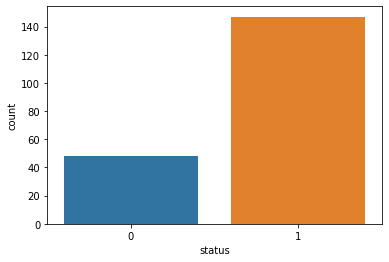

In [4]:
sns.countplot(df['status'])

### Q4. Check for missing vaues and take necessary measures by dropping observation or imputing them.

In [5]:
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [8]:
df=df.drop('name',axis=1)
df

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


### Q5. Plot the distribution of all the features. State any observations you can make based on the distribution plots.

<Figure size 2160x1296 with 0 Axes>

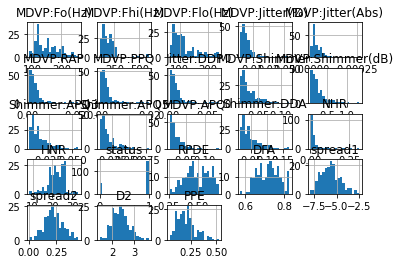

In [17]:
plt.figure(figsize=(30,18))
df.hist(bins=20)
plt.show()

### Q6. Check for outliers in the data. Are there any variables with high amount of outliers.

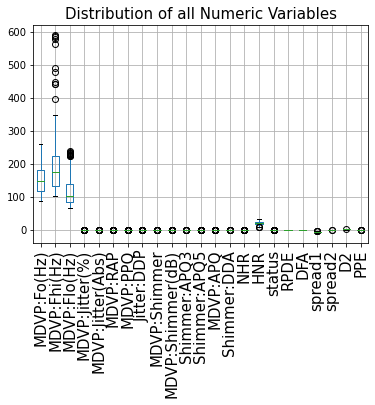

In [6]:
df.boxplot()
plt.title('Distribution of all Numeric Variables', fontsize = 15)
plt.xticks(rotation = 'vertical', fontsize = 15)
plt.show()

### Q7. Are there any strong correlations among the independent features?

<AxesSubplot:>

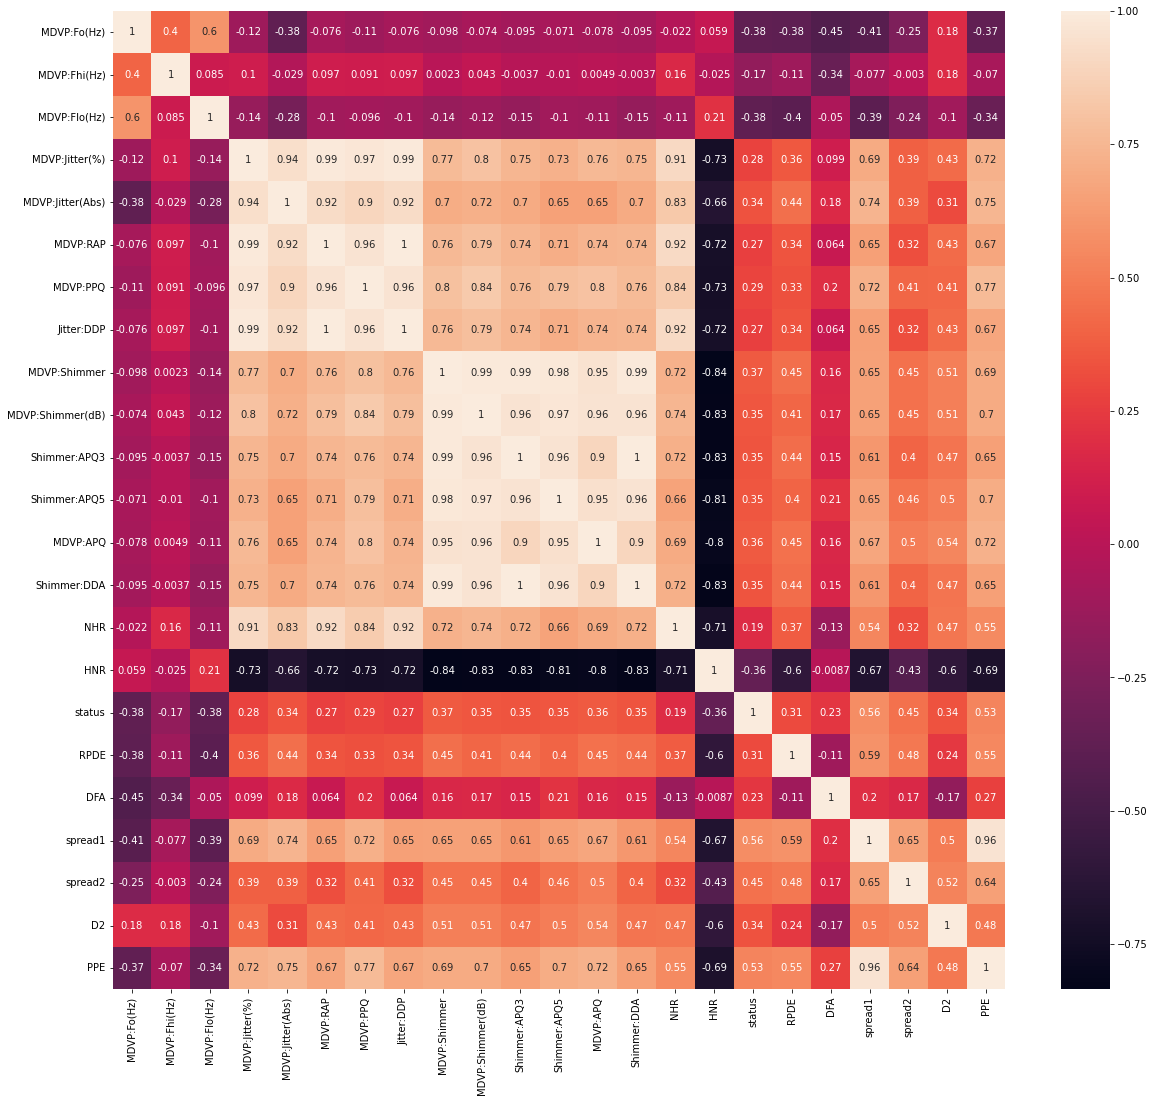

In [7]:
plt.figure(figsize=(20,18))
sns.heatmap(df.corr(),annot=True)

### Q8. Split dataset into training & test dataset  

In [10]:
x=df.drop('status',axis=1)
y=df['status']

In [11]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=20)

### Q9. Create a default decision tree model using criterion = Entropy 

In [15]:
decision_tree_full = DecisionTreeClassifier(criterion='entropy')
decision_tree_full = decision_tree_full.fit(xtrain, ytrain)

In [20]:
y_pred_xtrain=decision_tree_full.predict(xtrain)
y_pred_xtest=decision_tree_full.predict(xtest)

# print the performance measures
print(classification_report(ytrain,y_pred_xtrain))
print(classification_report(ytest,y_pred_xtest))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00       120

    accuracy                           1.00       156
   macro avg       1.00      1.00      1.00       156
weighted avg       1.00      1.00      1.00       156

              precision    recall  f1-score   support

           0       0.90      0.75      0.82        12
           1       0.90      0.96      0.93        27

    accuracy                           0.90        39
   macro avg       0.90      0.86      0.87        39
weighted avg       0.90      0.90      0.89        39



# Interpretation: From the above output, we can see that there is a difference between the train and test accuracy; thus, we can conclude that the decision tree is over-fitted on the train data.

# If we tune the hyperparameters in the decision tree, it helps to avoid the over-fitting of the tree.

### Q10.  Use regularization parameters of max_depth, min_sample_leaf to recreate the model. What is the impact on the model accuracy? How does regularization help? 

In [21]:
tuned_parameter=[{'criterion' : ['entropy', 'gini'],
 'max_depth': range(2, 10),
 'min_samples_split': range(2,10)}]
decision_tree_classifier=DecisionTreeClassifier(random_state=10)
tree_grid=GridSearchCV(estimator=decision_tree_classifier,param_grid=tuned_parameter,cv=5)
grid_model=tree_grid.fit(xtrain,ytrain)
print('best parameter:',grid_model.best_params_)

best parameter: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2}


In [22]:
decision_tree_full = DecisionTreeClassifier(criterion='entropy',max_depth=3,min_samples_split=2)
decision_tree_full = decision_tree_full.fit(xtrain, ytrain)

In [23]:
y_pred_xtrain=decision_tree_full.predict(xtrain)
y_pred_xtest=decision_tree_full.predict(xtest)

In [24]:
print(classification_report(ytrain,y_pred_xtrain))
print(classification_report(ytest,y_pred_xtest))

              precision    recall  f1-score   support

           0       0.91      0.86      0.89        36
           1       0.96      0.97      0.97       120

    accuracy                           0.95       156
   macro avg       0.94      0.92      0.93       156
weighted avg       0.95      0.95      0.95       156

              precision    recall  f1-score   support

           0       0.91      0.83      0.87        12
           1       0.93      0.96      0.95        27

    accuracy                           0.92        39
   macro avg       0.92      0.90      0.91        39
weighted avg       0.92      0.92      0.92        39



# Interpretation: From the above output, we can see that there is slight significant difference between the train and test accuracy; thus, we can conclude that the decision tree is less over-fiited after specifying some of the hyperparameters.

### Q11. Implement a Random Forest model. What is the optimal number of trees that gives the best result?

In [32]:
tuned_paramaters = [{'criterion' : ['entropy', 'gini'],'n_estimators': [90,100,150,200],
                     'max_depth': [10, 15, 20],
                'min_samples_split': [2, 5, 8]}]

random_forest_classification = RandomForestClassifier(random_state = 10)

rf_grid = GridSearchCV(estimator = random_forest_classification, 
                       param_grid = tuned_paramaters, 
                       cv = 5)
rf_grid_model = rf_grid.fit(xtrain, ytrain)

# get the best parameters
print('Best parameters for random forest classifier: ', rf_grid_model.best_params_)

Best parameters for random forest classifier:  {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 90}


In [34]:
rf_classification = RandomForestClassifier(criterion='gini',n_estimators = 90,max_depth=10,min_samples_split=2)
rf_model = rf_classification.fit(xtrain, ytrain)
y_pred_xtrain=rf_model.predict(xtrain)
y_pred_xtest=rf_model.predict(xtest)

# print the performance measures
print(classification_report(ytrain,y_pred_xtrain))
print(classification_report(ytest,y_pred_xtest))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00       120

    accuracy                           1.00       156
   macro avg       1.00      1.00      1.00       156
weighted avg       1.00      1.00      1.00       156

              precision    recall  f1-score   support

           0       0.90      0.75      0.82        12
           1       0.90      0.96      0.93        27

    accuracy                           0.90        39
   macro avg       0.90      0.86      0.87        39
weighted avg       0.90      0.90      0.89        39

